Intercept: 4.20607718142562
Slope: 2.9827303563323175


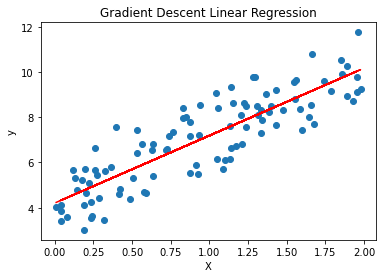

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Define gradient descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

# Run gradient descent
theta = gradient_descent(X_b, y)

# Print the parameters of the fitted line
print("Intercept:", theta[0][0])
print("Slope:", theta[1][0])

# Plot data points and fitted line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Linear Regression")
plt.show()

Intercept: 0.18699354364714896
Coefficients: [[0.39670793]
 [0.71812505]]


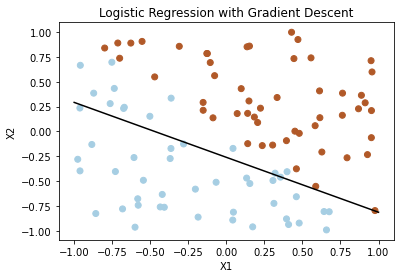

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for binary classification
np.random.seed(0)
X = 2 * np.random.rand(100, 2) - 1
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Define logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define gradient descent function for logistic regression
def logistic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X.T.dot(sigmoid(X.dot(theta)) - y.reshape(-1, 1))
        theta -= learning_rate * gradients

    return theta

# Run logistic regression gradient descent
theta = logistic_gradient_descent(X_b, y)

# Print the parameters of the fitted logistic regression
print("Intercept:", theta[0][0])
print("Coefficients:", theta[1:])

# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
x_boundary = np.array([-1, 1])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, 'k-')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression with Gradient Descent")
plt.show()

In [3]:
def gradient_descent(func, initial_guess, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """
    Perform gradient descent to minimize a univariate function.

    Parameters:
        func (callable): The objective function to minimize.
        initial_guess (float): Initial guess for the minimum.
        learning_rate (float): The learning rate for gradient descent.
        max_iterations (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance.

    Returns:
        float: The minimum value found.
        float: The location of the minimum.
    """
    x = initial_guess

    for i in range(max_iterations):
        gradient = (func(x + tolerance) - func(x)) / tolerance
        step = learning_rate * gradient
        x -= step

        if abs(step) < tolerance:
            break

    return func(x), x

# Example usage:
def f(x):
    return x**2 + 5*x + 6

min_value, min_location = gradient_descent(f, initial_guess=0)
print("Minimum value:", min_value)
print("Location of the minimum:", min_location)

Minimum value: -0.24999999768958858
Location of the minimum: -2.4999519332613573


In [4]:
class KnowledgeBasedAgent:
    def __init__(self, knowledge_base):
        self.knowledge_base = knowledge_base

    def add_percept(self, percept):
        self.knowledge_base.tell(percept)

    def get_best_action(self):
        return self.knowledge_base.ask()

    def take_action(self, action):
        # Assume that the agent tells the knowledge base that it has taken the action
        self.knowledge_base.tell(action)


# Example Knowledge Base (Can be extended or replaced with a more sophisticated one)
class SimpleKnowledgeBase:
    def __init__(self):
        self.knowledge = []

    def tell(self, percept):
        self.knowledge.append(percept)

    def ask(self):
        # This is a very simple knowledge base that always returns a predefined action
        return "Do something"


# Example usage:
if __name__ == "__main__":
    # Initialize the knowledge base
    kb = SimpleKnowledgeBase()

    # Initialize the agent with the knowledge base
    agent = KnowledgeBasedAgent(kb)

    # Add a percept to the agent
    percept = "Some percept"
    agent.add_percept(percept)

    # Get the best action from the agent's knowledge base
    best_action = agent.get_best_action()
    print("Best Action:", best_action)

    # Agent takes action
    agent.take_action(best_action)


Best Action: Do something


In [5]:
def TT_ENTAILS(KB, alpha):
    symbols = list(set(KB + alpha))
    return TT_CHECK_ALL(KB, alpha, symbols, {})


def TT_CHECK_ALL(KB, alpha, symbols, model):
    if not symbols:
        if PL_TRUE(KB, model):
            return PL_TRUE(alpha, model)
        else:
            return True  # When KB is false, always return True
    else:
        P = symbols[0]
        rest = symbols[1:]
        return (TT_CHECK_ALL(KB, alpha, rest, {**model, P: True}) and
                TT_CHECK_ALL(KB, alpha, rest, {**model, P: False}))


def PL_TRUE(sentence, model):
    # Function to evaluate whether a sentence is true given a model
    pass  # Placeholder for actual implementation


# Example usage:
KB = ["A", "B", "C"]
alpha = ["A"]

result = TT_ENTAILS(KB, alpha)
print("Entailment result:", result)


Entailment result: True


Boolean Expression:
  X = A AND NOT (B XOR C)

Truth Table:
  -----------------
  | A | B | C | X |
  -----------------
  | 0 | 0 | 0 | 0 |
  -----------------
  | 0 | 0 | 1 | 0 |
  -----------------
  | 0 | 1 | 0 | 0 |
  -----------------
  | 0 | 1 | 1 | 0 |
  -----------------
  | 1 | 0 | 0 | 1 |
  -----------------
  | 1 | 0 | 1 | 0 |
  -----------------
  | 1 | 1 | 0 | 0 |
  -----------------
  | 1 | 1 | 1 | 1 |
  -----------------


In [17]:
import itertools
import re

class Gob(object):
    pass

class Truths(object):
    def __init__(self, base=None, phrases=None, ints=True):
        if not base:
            raise Exception('Base items are required')
        self.base = base
        self.phrases = phrases or []
        self.ints = ints
        self.rows = []

        # generate the sets of booleans for the bases
        self.base_conditions = list(itertools.product([False, True],
                                                      repeat=len(base)))

        # regex to match whole words defined in self.bases
        # used to add object context to variables in self.phrases
        self.p = re.compile(r'(?<!\w)(' + '|'.join(self.base) + ')(?!\w)')

    def calculate(self, *args):
        # store bases in an object context
        g = Gob()
        for a, b in zip(self.base, args):
            setattr(g, a, b)

        # add object context to any base variables in self.phrases
        # then evaluate each
        eval_phrases = []
        for item in self.phrases:
            item = self.p.sub(r'g.\1', item)
            eval_phrases.append(eval(item))

        # add the bases and evaluated phrases to create a single row
        row = [getattr(g, b) for b in self.base] + eval_phrases
        if self.ints:
            row = [int(item) for item in row]
        self.rows.append(row)

    def __str__(self):
        headers = self.base + self.phrases
        output = [headers]
        for conditions_set in self.base_conditions:
            self.calculate(*conditions_set)
            output.append(self.rows[-1])
        return self.format_table(output)

    def format_table(self, data):
        max_lengths = [max(len(str(row[i])) for row in data) for i in range(len(data[0]))]
        formatted_data = [' | '.join(str(row[i]).ljust(max_lengths[i]) for i in range(len(row))) for row in data]
        return '\n'.join(formatted_data)

# Example usage
base_items = ['P', 'Q', 'R']
phrases = ['(P & Q)', '(P | R)']
truth_table = Truths(base_items, phrases)
print(truth_table)


P | Q | R | (P & Q) | (P | R)
0 | 0 | 0 | 0       | 0      
0 | 0 | 1 | 0       | 1      
0 | 1 | 0 | 0       | 0      
0 | 1 | 1 | 0       | 1      
1 | 0 | 0 | 0       | 1      
1 | 0 | 1 | 0       | 1      
1 | 1 | 0 | 1       | 1      
1 | 1 | 1 | 1       | 1      


In [15]:
base_items = ['P', 'Q', 'R']
phrases = ['(P & Q)', '(~P ^ R)']

truth_table = Truths(base_items, phrases)

print(truth_table)

+---+---+---+---------+----------+
| P | Q | R | (P & Q) | (~P ^ R) |
+---+---+---+---------+----------+
| 0 | 0 | 0 |    0    |    -1    |
| 0 | 0 | 1 |    0    |    -2    |
| 0 | 1 | 0 |    0    |    -1    |
| 0 | 1 | 1 |    0    |    -2    |
| 1 | 0 | 0 |    0    |    -2    |
| 1 | 0 | 1 |    0    |    -1    |
| 1 | 1 | 0 |    1    |    -2    |
| 1 | 1 | 1 |    1    |    -1    |
+---+---+---+---------+----------+


P | Q | R | (P & Q) | (P | R)
0 | 0 | 0 | 0       | 0      
0 | 0 | 1 | 0       | 1      
0 | 1 | 0 | 0       | 0      
0 | 1 | 1 | 0       | 1      
1 | 0 | 0 | 0       | 1      
1 | 0 | 1 | 0       | 1      
1 | 1 | 0 | 1       | 1      
1 | 1 | 1 | 1       | 1      
